<h3>Подключение необходимых библиотек и модулей</h3>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor, plot_tree
from matplotlib.ticker import NullLocator
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot

from evaluation import (
    evaluate_regression,
    plot_regression,
    residuals_histogram,
    calculate_importance_gains,
    plot_feature_importances,
)

<h3>Загрузка данных из CSV</h3>

In [8]:
df = pd.read_csv("diamonds2.csv")
columns_mapping = {
    "carat": "Карат",
    "cut": "Огранка",
    "color": "Цвет",
    "clarity": "Чистота",
    "depth": "Глубина",
    "table": "Площадка",
    "price": "Цена",
    "x": "Длина",
    "y": "Ширина",
    "z": "Высота",
}
df.rename(columns=columns_mapping, inplace=True)
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Основная информация о наборе данных</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Карат     53940 non-null  float64
 1   Огранка   53940 non-null  object 
 2   Цвет      53940 non-null  object 
 3   Чистота   53940 non-null  object 
 4   Глубина   53940 non-null  float64
 5   Площадка  53940 non-null  float64
 6   Цена      53940 non-null  int64  
 7   Длина     53932 non-null  float64
 8   Ширина    53933 non-null  float64
 9   Высота    53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<img src="https://www.bronnitsy.com/upload/medialibrary/113/113d1df9338cf41da2347aaec5f8ed99.jpg">

In [9]:
df.isnull().sum()

Карат        0
Огранка      0
Цвет         0
Чистота      0
Глубина      0
Площадка     0
Цена         0
Длина        8
Ширина       7
Высота      20
dtype: int64

<h3>Удаление пропусков</h3>

In [10]:
df = df.dropna()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Удаление дубликатов</h3>

In [11]:
df = df.drop_duplicates()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Описательные статистики количественных переменных</h3>

In [12]:
df.describe().round(3)

,Карат,Глубина,Площадка,Цена,Длина,Ширина,Высота
count,53775.000,53775.000,53775.000,53775.000,53775.000,53775.000,53775.000
mean,0.798,61.748,57.458,3931.220,5.732,5.735,3.540
std,0.473,1.430,2.233,3985.919,1.119,1.139,0.702
min,0.200,43.000,43.000,326.000,3.730,3.680,1.070
25%,0.400,61.000,56.000,951.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.000,5.700,5.710,3.530
75%,1.040,62.500,59.000,5324.000,6.540,6.540,4.030
max,5.010,79.000,95.000,18823.000,10.740,58.900,31.800


<h3>Судя по описательным статистикам в цене присутствуют потенциальные выбросы.</h3>

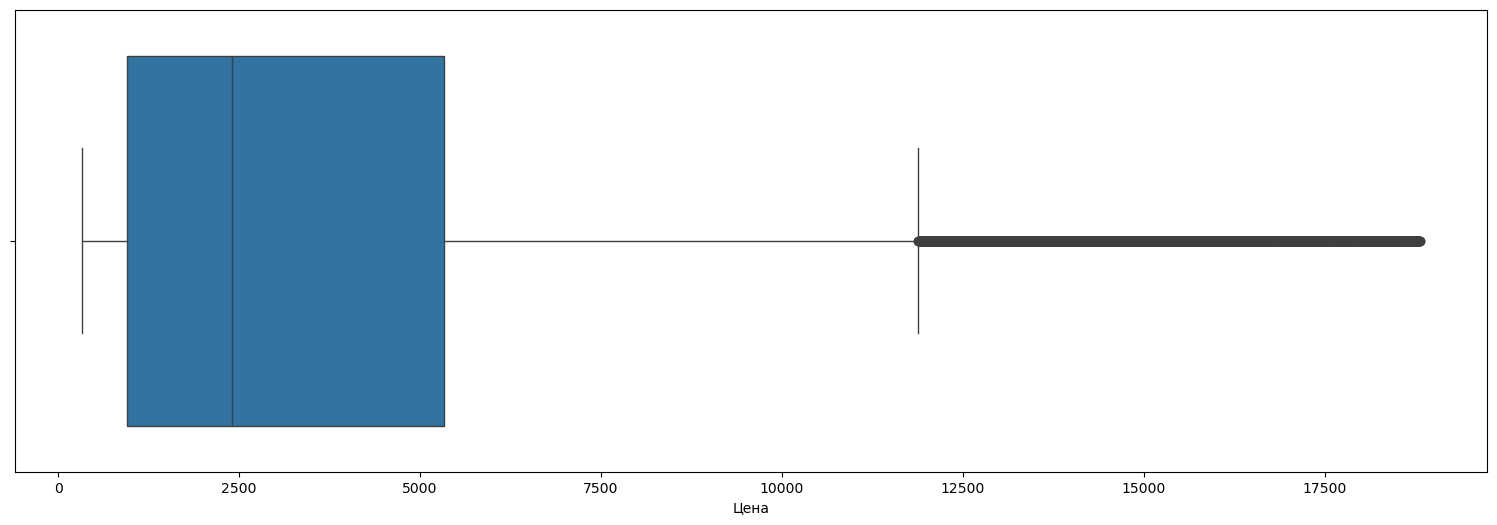

In [13]:
plt.figure(figsize=(19, 6))
sns.boxplot(df, x="Цена")
plt.show()

<h3>В целевой переменной (цена) большое количество значений, которые превышают Q3 + 1.5 * IQR</h3>

In [14]:
def plot_hist_with_kde(data, mode=None, font_size: int = 18):
    plt.figure(figsize=(19, 6))
    plt.title(
        rf"Гистрограмма распределения, $\sigma$ = {data.std():.3f}",
        fontsize=font_size,
    )
    ax = sns.histplot(data, kde=True)
    ax.lines[0].set_color("red")

    plt.axvline(
        x=data.mean(),
        linewidth=6,
        linestyle="--",
        color="g",
        label=f"Среднее = {data.mean():.3f}",
    )

    plt.axvline(
        x=np.median(data),
        linewidth=6,
        linestyle="-.",
        color="m",
        label=f"Медиана = {np.median(data):.3f}",
    )
    if mode is not None:
        plt.axvline(
            x=mode, linewidth=6, linestyle=":", color="k", label=f"Мода = {mode}"
        )
    plt.xlabel("Значения", fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.ylabel("Количество", fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size, shadow=True)
    plt.show()

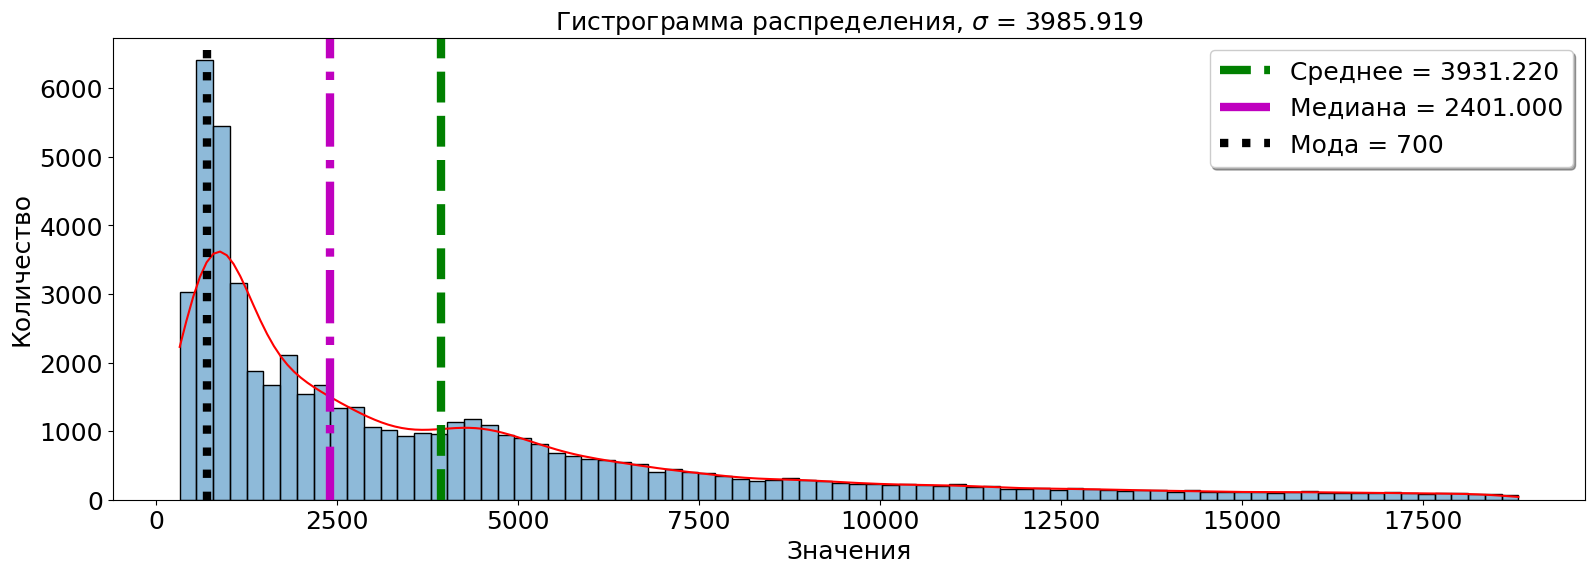

In [15]:
plot_hist_with_kde(df["Цена"], mode=700)

<h3><b>Вывод 1</b>: Распределение цены отлично от нормального. Данные имеют <a href="https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution">распределение Уайльда (обратное распределение Гаусса)</a>. Среднее, медиана и мода не равны. <a href="https://wiki.loginom.ru/articles/3-sigma-rule.html">Правило 3 сигм</a> не выполняется. Распределение не симметрично относительно среднего.</h3>

In [16]:
def plot_qq(data, font_size: int = 18):
    fig, ax = plt.subplots(figsize=(19, 6))
    plt.title("График квантиль-квантиль", fontsize=font_size)
    qqplot(data, line="45", fit=True, ax=ax)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlabel("Теоретические квантили", fontsize=font_size)
    plt.ylabel("Фактические квантили", fontsize=font_size)
    plt.show()

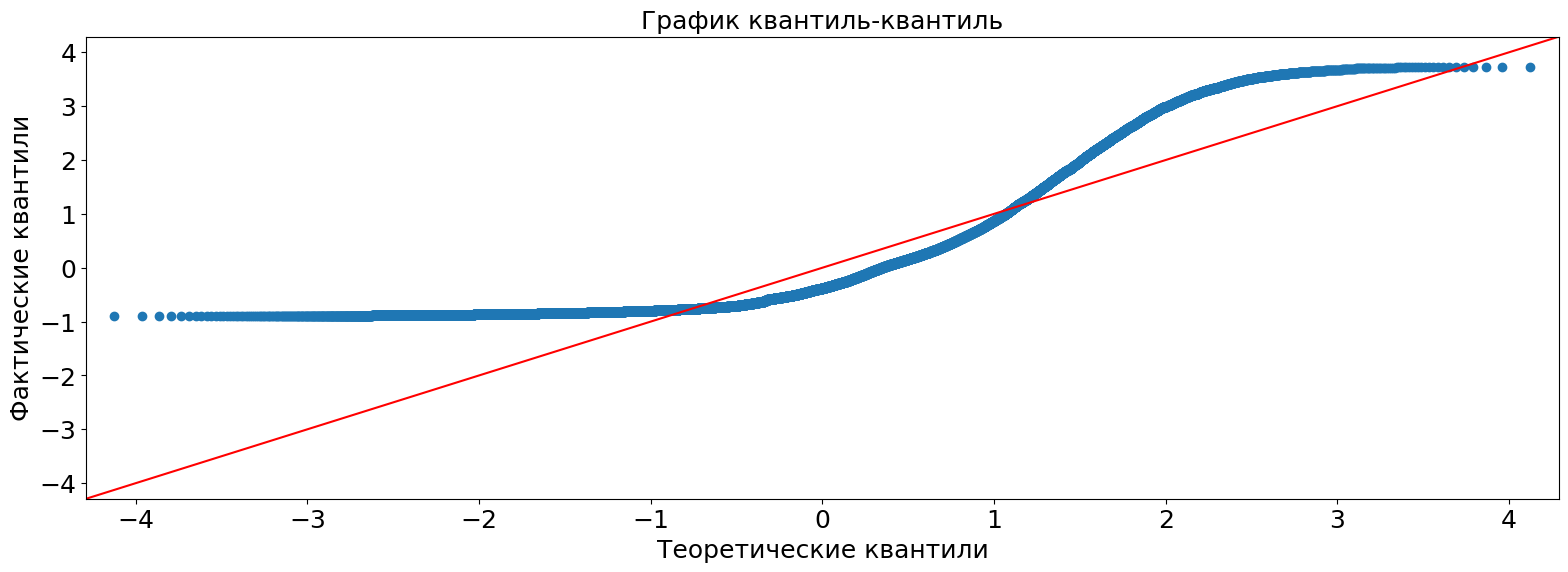

In [17]:
plot_qq(df["Цена"])

<h3><b>Вывод 2</b>: Теоретические (для нормального распределения) и фактические квантили не совпадают.</h3>

In [18]:
skewness = skew(df["Цена"])
print(f"Коэффициент асимметрии равен {round(skewness, 3)}")
kurt = kurtosis(df["Цена"])
print(f"Коэффициент эксцесса равен {round(kurt, 3)}")

Коэффициент асимметрии равен 1.618
Коэффициент эксцесса равен 2.179


<h3><b>Вывод 3</b>: Коэффициенты <a href="https://ru.wikipedia.org/wiki/Коэффициент_асимметрии">асимметрии</a> и <a href="https://en.wikipedia.org/wiki/Kurtosis">эксцесса</a> отличны от показателей для нормального распределения. Коэффициент асимметрии больше нуля - это означает, что данные смещены влево, а хвост распределения вытянут вправо. Коэффициент эксцесса больше нуля - это означает, что распределение имеет более острый пик и более тяжёлые хвосты.</h3>

<h3><b>Вывод 4</b>: Выводы 1 - 3 надо учитывать при подборе модели. Выбросы было решено не удалять, так как часто нужно бывает формировать прогноз и для таких объектов. Для этого лучше подойдут устойчивые регрессионные модели.</h3>

<h3>Описательные статистики категориальных переменных</h3>

In [19]:
df.describe(include="object")

,Огранка,Цвет,Чистота
count,53775,53775,53775
unique,5,7,8
top,Ideal,G,SI1
freq,21485,11254,13030


In [20]:
df["Огранка"].value_counts()

Огранка
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64

In [21]:
df["Цвет"].value_counts()

Цвет
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64

In [22]:
df["Чистота"].value_counts()

Чистота
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64

<img src="https://sunlight.net/wiki/wp-content/uploads/2021/04/diamods_characteristics_1.jpg">

<h3><b>Вывод 5</b>: Все эти категориальные данные влияют на стоимость бриллиантов исходя из предметной области.</h3>

<h3>Анализ зависимостей в данных с помощью коэффицента корреляции Спирмена</h3>

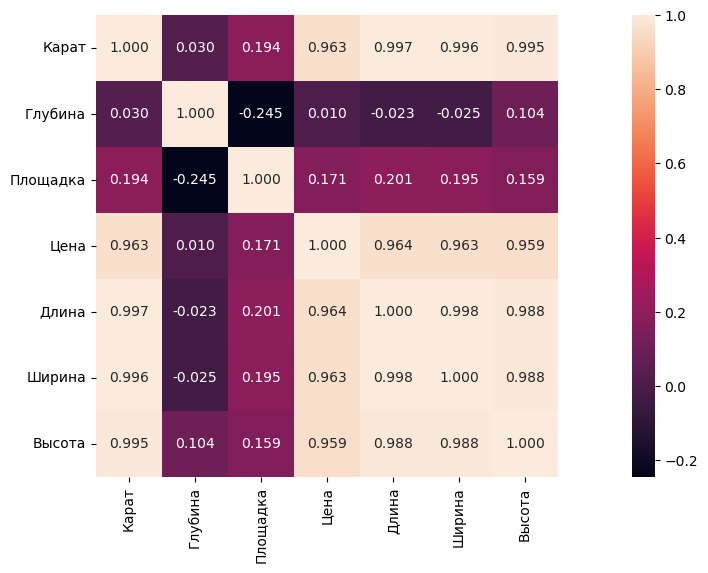

In [23]:
plt.figure(figsize=(19, 6))
sns.heatmap(
    df.select_dtypes(exclude="object").corr(method="spearman").round(3),
    square=True,
    annot=True,
    fmt=".3f",
)
plt.show()

<h3><b>Вывод 6</b>: Карат имеет сильную положительную монотонную корреляцию с ценой. В данных есть <a href="ru.wikipedia.org/wiki/Мультиколлинеарность">мультиколлинеарность</a> - сильная корреляцию между факторами: Карат, Длина, Ширина, Высота. Из этих факторов было решено оставить только Карат, так как он имеет наибольшую зависимость с целевой переменной. Площадка и Глубина имеют слабую монотонную зависимость с целевой переменной, но возможно там более сложная закономерность. Это нужно проверить с помощью диаграмм рассеяния.</h3>

In [24]:
df = df.drop(columns=["Длина", "Ширина", "Высота"])
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


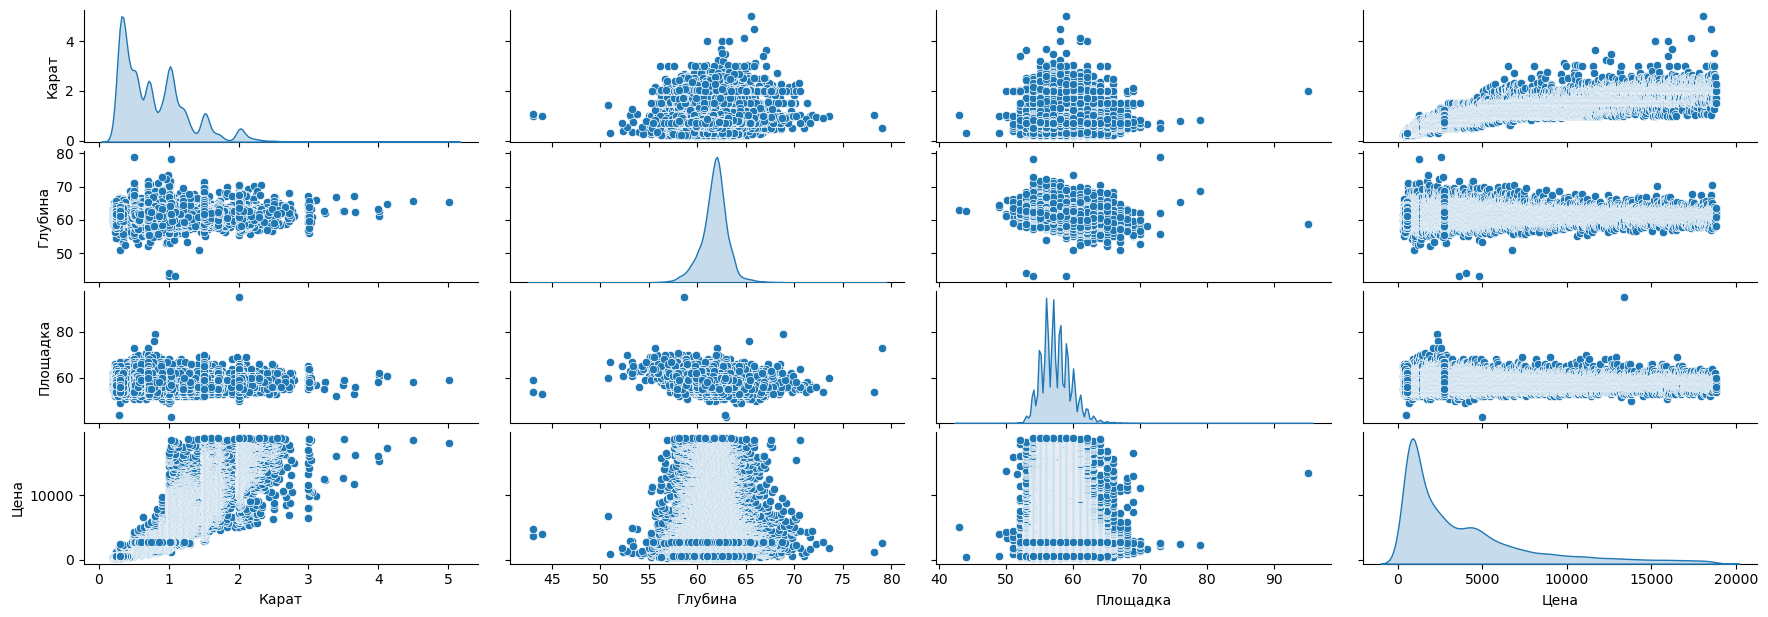

In [25]:
fig = sns.pairplot(df, diag_kind="kde", corner=False)
fig.fig.set_size_inches(19, 6)
plt.show()

<h3><b>Вывод 7</b>: Карат повторяет вид распределения Цены. Распределение Глубины больше похоже на нормальное. Площадка имеет распределение близкое к обратному нормальному. Судя по диаграмме рассеяния факторы Глубина и Площадка существенно не влияют на цену. Поэтому их нужно удалить.</h3>

In [26]:
df = df.drop(columns=["Глубина", "Площадка"])
df

,Карат,Огранка,Цвет,Чистота,Цена
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


<h3>Преобразуем типы данных для лучшего быстродействия</h3>

In [27]:
df = df.copy()

for column in df.select_dtypes(include=["float64", "int64"]):
    df[column] = df[column].astype("float32")

for column in df.select_dtypes(include="object"):
    df[column] = df[column].astype("category")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Карат    53775 non-null  float32 
 1   Огранка  53775 non-null  category
 2   Цвет     53775 non-null  category
 3   Чистота  53775 non-null  category
 4   Цена     53775 non-null  float32 
dtypes: category(3), float32(2)
memory usage: 998.7 KB


In [29]:
df

,Карат,Огранка,Цвет,Чистота,Цена
0,0.23,Ideal,E,SI2,326.0
1,0.21,Premium,E,SI1,326.0
2,0.23,Good,E,VS1,327.0
3,0.29,Premium,I,VS2,334.0
4,0.31,Good,J,SI2,335.0
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757.0
53936,0.72,Good,D,SI1,2757.0
53937,0.70,Very Good,D,SI1,2757.0
53938,0.86,Premium,H,SI2,2757.0


In [30]:
y = df["Цена"]
X = df.drop(columns=["Цена"])
X

,Карат,Огранка,Цвет,Чистота
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


<h3>Разбиение выборки на тренировочную, тестовую и валидационную</h3>

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=1
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    shuffle=True,
    test_size=0.5,
    random_state=1,
)

<h3>Обучение модели после обработки данных</h3>

In [32]:
model = LGBMRegressor(
    n_jobs=-1,
    random_state=1,
    force_col_wise=True,
    importance_type="gain",
    verbose=-1,
).fit(X_train, y_train)

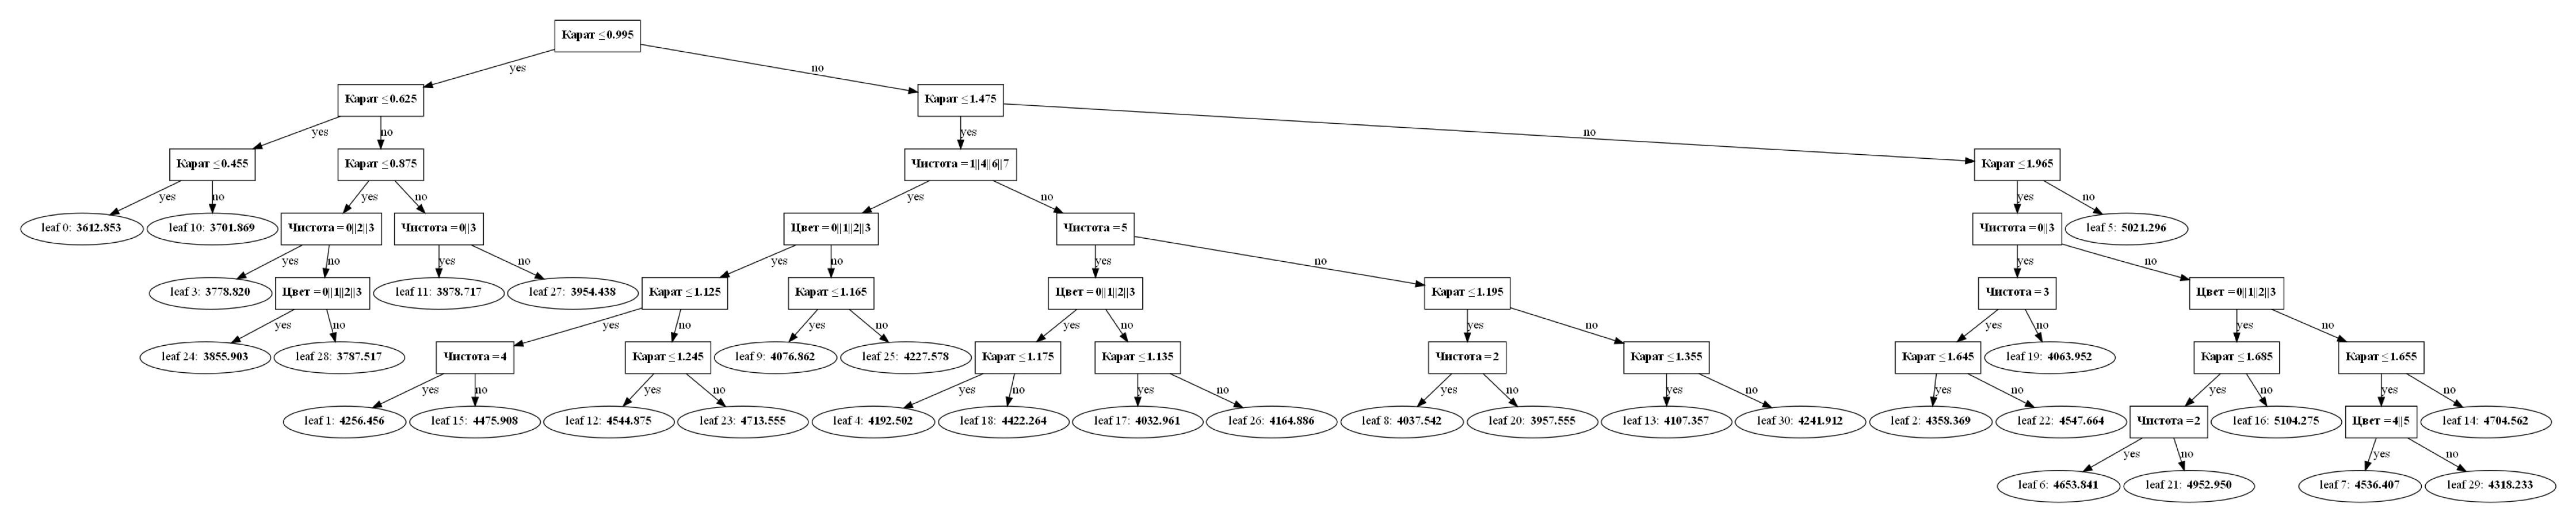

In [33]:
plot_tree(model, figsize=(19, 6), tree_index=0, orientation="vertical", dpi=300)
plt.show()

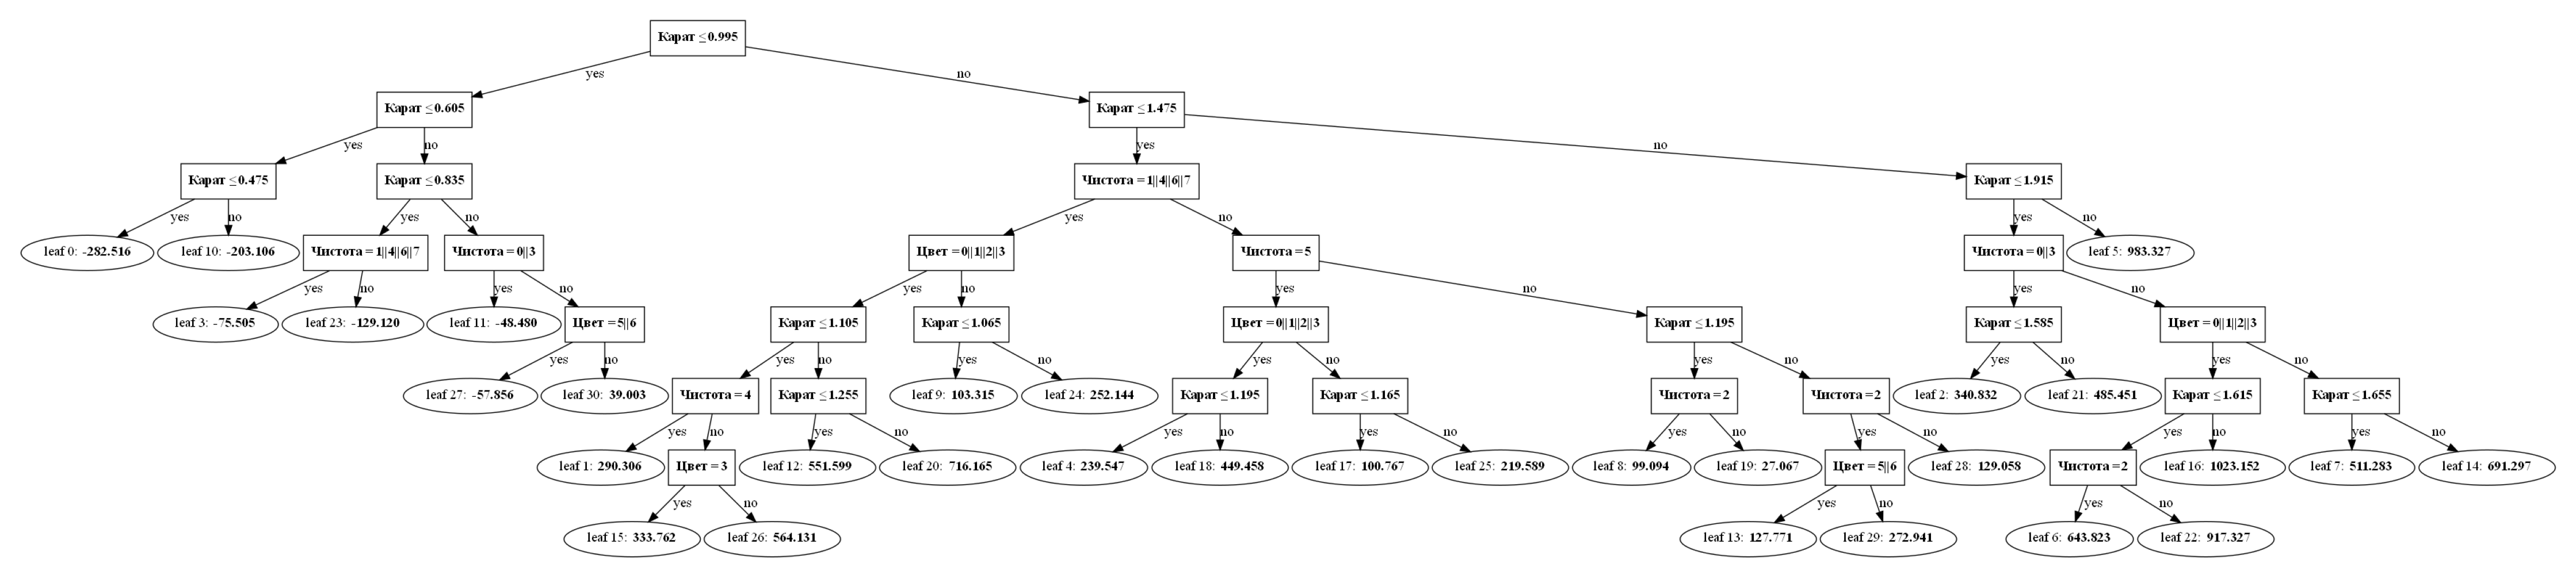

In [34]:
plot_tree(model, figsize=(19, 6), tree_index=1, orientation="vertical", dpi=300)
plt.show()

In [35]:
feature_importances_percent = calculate_importance_gains(model, X_train.columns)
feature_importances_percent

,information gain (%)
Карат,90.723
Чистота,6.219
Цвет,2.763
Огранка,0.294


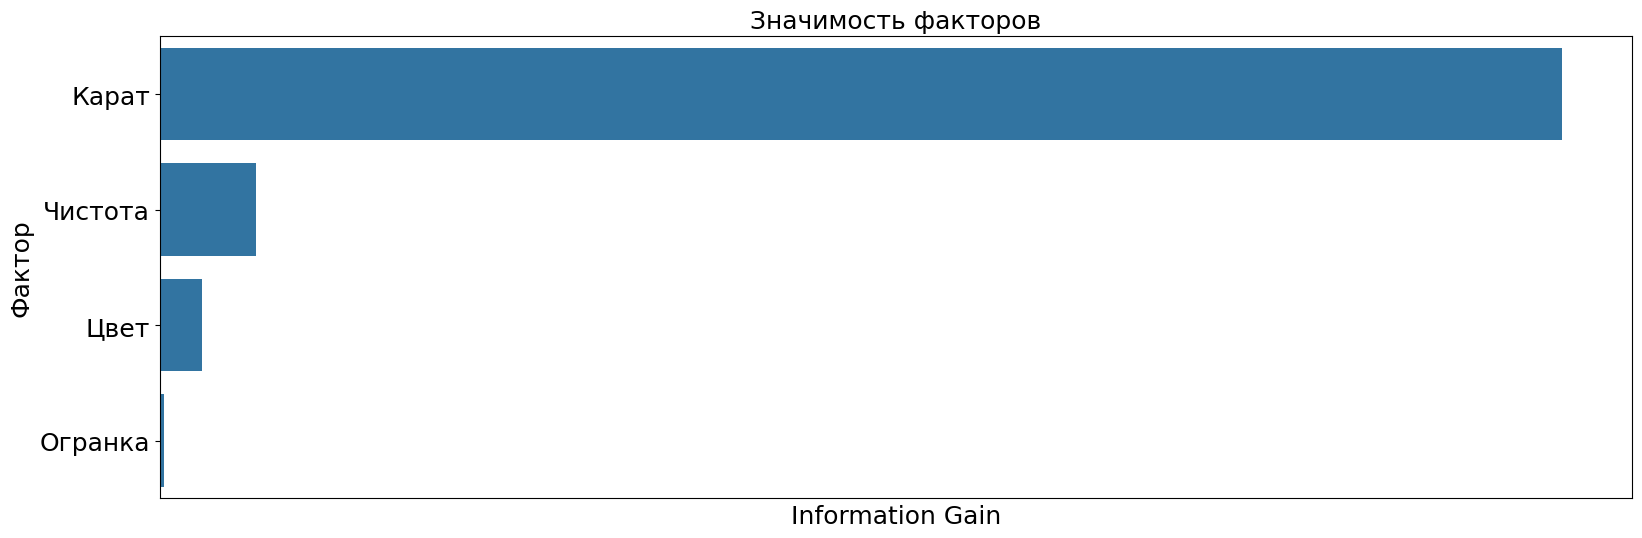

In [36]:
plot_feature_importances(feature_importances_percent)

<h3><b>Вывод 8</b>: Наиболее значимым фактором является Карат. Из категориальных переменных - Чистота. Первые три фактора: Карат, Чистота и Цвет обеспечивают 99 % прироста информации для модели.</h3>

<h3>Оценка модели</h3>

In [37]:
y_pred_train = model.predict(X_train)
evaluate_regression(y_train, y_pred_train, len(X_train.columns))

RMSE равняется 513.827
MAE равняется 273.139
MAPE равняется 8.052 %
Adjusted R2 равняется 0.983


In [38]:
y_pred_val = model.predict(X_val)
evaluate_regression(y_val, y_pred_val, len(X_train.columns))

RMSE равняется 531.766
MAE равняется 280.835
MAPE равняется 7.982 %
Adjusted R2 равняется 0.982


<center><h3>Метрики качества модели </h3>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>513.827</td>
    <td>531.766</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>273.139</td>
    <td>280.835</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>8.052</td>
    <td>7.982</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.983</td>
    <td>0.982</td>
  </tr>
</table></center>

<h3><b>Вывод 9</b>: Показатели на обучающей и валидационной выборке не сильно отличаются, отсутствует переобучение. Доля переобучения сократилась, метрики стали стабильнее.</h3>

У базовой модели $\frac{MAE_{\text{val}}}{MAE_{\text{train}}} \approx 1.07$, а $\frac{RMSE_{\text{val}}}{RMSE_{\text{train}}} \approx 1.14$;

У новой модели $\frac{MAE_{\text{val}}}{MAE_{\text{train}}} \approx 1.03$, а $\frac{RMSE_{\text{val}}}{RMSE_{\text{train}}} \approx 1.03$.

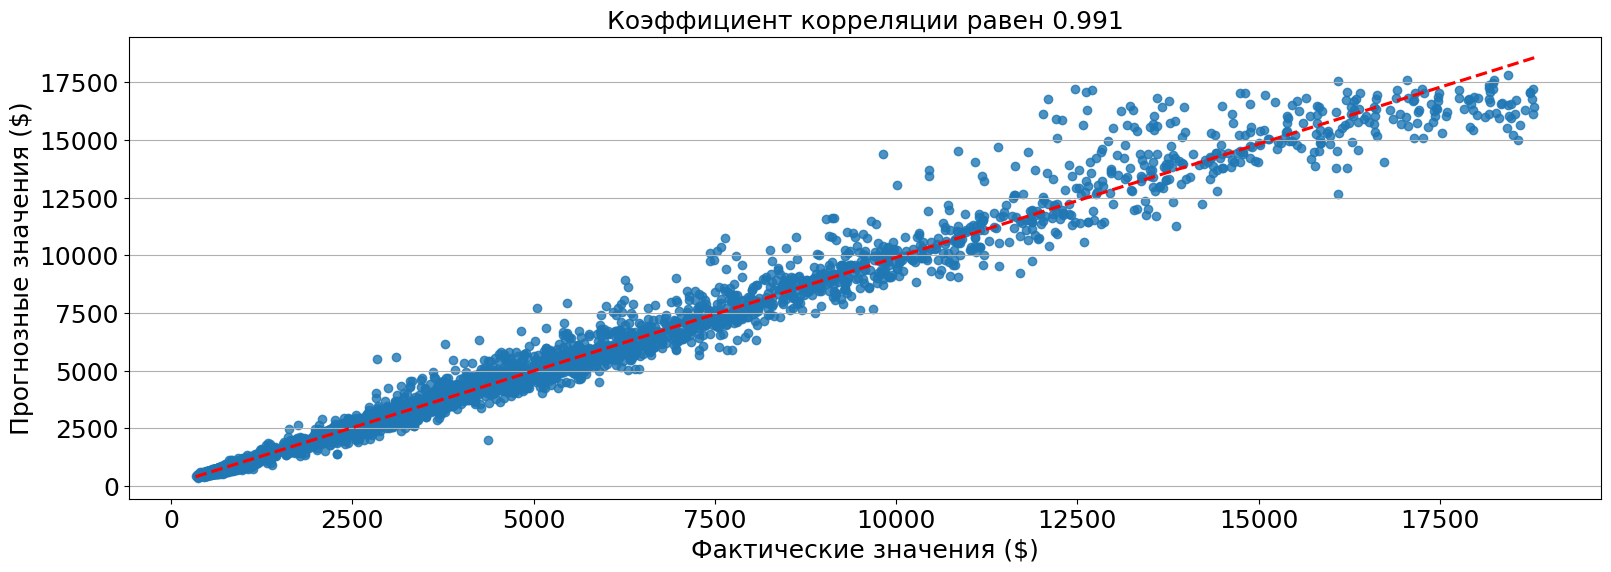

In [39]:
plot_regression(y_val.values, y_pred_val)

<h3><b>Вывод 10</b>: Коэффициент линейной корреляции Пирсона между фактическими и прогнозными значениями очень большой. Сократилось количество завышенных и заниженных прогнозов.</h3>

<h3>Анализ остатков модели на валидационной выборке</h3>

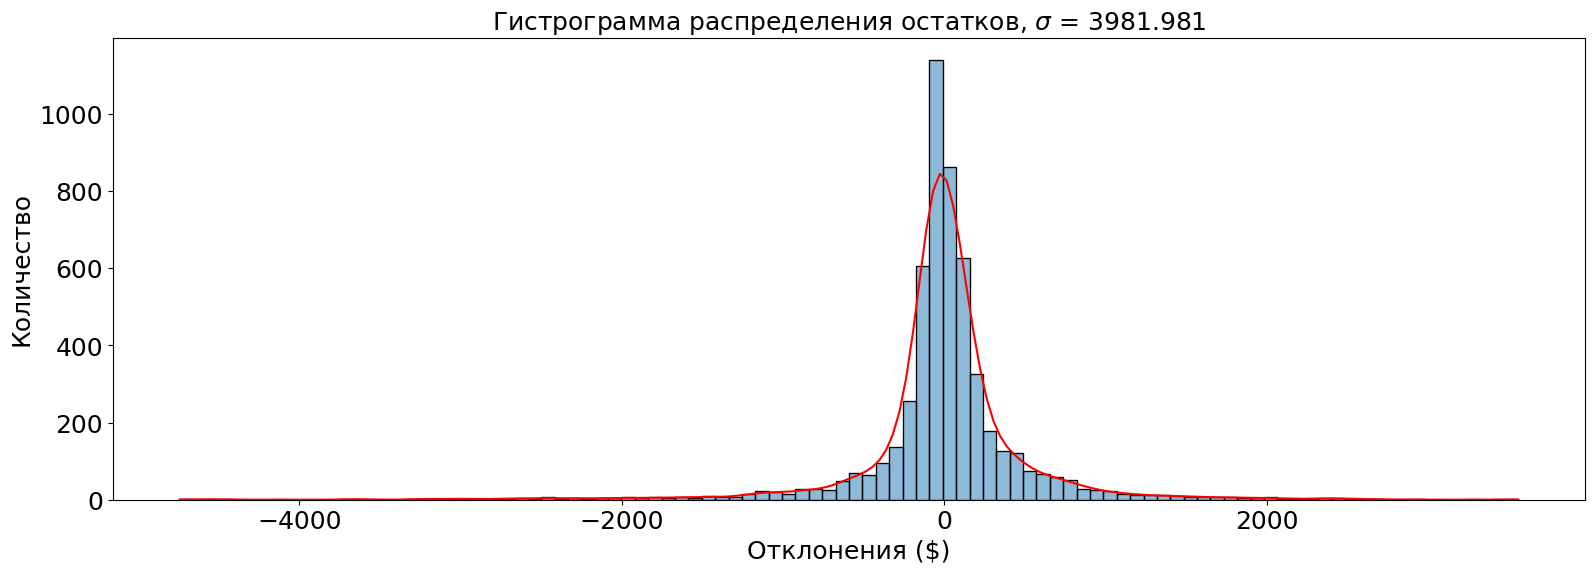

In [40]:
residuals_histogram(y_val, y_pred_val)

<h3><b>Вывод 11</b>: Отклонения не превышают 2 сигм и в основном находятся в окрестности нуля. Распределение остатков похоже на нормальное. Отсутствуют критические отклонения в 10000 долларов, как было у базовой модели.</h3>